# Data Modeling Assignment
***

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

# Data Reading and Extracting
***

In [2]:
# Reading Dataset
ground_water = pd.read_csv("ground_water_quality_2022_post.csv")
ground_water_df = pd.DataFrame(ground_water)
ground_water_df = ground_water_df.dropna()

ground_water_df = ground_water_df.rename(columns = {'NO3 ': 'NO3'})
ground_water_df = ground_water_df.rename(columns = {'RSC  meq  / L': 'RSC'})
numeric = ground_water_df.select_dtypes(include=['number']).columns
nonnumeric = ground_water_df.select_dtypes(exclude=['number']).columns

In [3]:
# Standardizing Data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(ground_water_df[numeric])

ground_water_df[numeric] = scaled_data

ground_water_df[numeric].info()

<class 'pandas.core.frame.DataFrame'>
Index: 817 entries, 0 to 1023
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sno       817 non-null    float64
 1   lat_gis   817 non-null    float64
 2   long_gis  817 non-null    float64
 3   RL_GIS    817 non-null    float64
 4   pH        817 non-null    float64
 5   E.C       817 non-null    float64
 6   TDS       817 non-null    float64
 7   CO3       817 non-null    float64
 8   HCO3      817 non-null    float64
 9   Cl        817 non-null    float64
 10  F         817 non-null    float64
 11  NO3       817 non-null    float64
 12  SO4       817 non-null    float64
 13  Na        817 non-null    float64
 14  K         817 non-null    float64
 15  Ca        817 non-null    float64
 16  Mg        817 non-null    float64
 17  T.H       817 non-null    float64
 18  SAR       817 non-null    float64
 19  RSC       817 non-null    float64
dtypes: float64(20)
memory usage: 134.0 K

In [4]:
# Extracting Chosen Feature to Dataframe
working_gw_df = ground_water_df[['RSC', 'SAR', 'Na', 'E.C', 'TDS', 'HCO3', 'pH', 'mandal', 'village', 'Classification.1']]
working_gw_df = working_gw_df.replace('MR', 'U.S.')

# Changing the Classification.1 to Numeric Valyes (P.S. = 0, U.S. = 1)
le = LabelEncoder()
working_gw_df['Classification.1']= le.fit_transform(working_gw_df['Classification.1']) 

# One-hot encode 'mandal' and 'village' columns separately
mandal_dummies = pd.get_dummies(working_gw_df['mandal'], prefix='mandal')
village_dummies = pd.get_dummies(working_gw_df['village'], prefix='village')

# Concatenate the encoded columns with the original DataFrame
working_gw_df_encoded = pd.concat([working_gw_df.drop(['mandal', 'village'], axis=1), mandal_dummies, village_dummies], axis=1)

# Display the modified DataFrame
working_gw_df_encoded.head()

,RSC,SAR,Na,E.C,TDS,HCO3,pH,Classification.1,mandal_Abdullapurmet,mandal_Achampet,...,village_Yenkiryal,village_Yennaram,village_Yenugonda,village_Yeravaguda,village_Yerkaram,village_Yerrapahad,village_Zafergad,village_Zaptisingaipally,village_kanagala,village_perkit
0,-0.397517,-0.269850,-0.217122,-0.058802,-0.057868,-0.167582,0.554699,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0.381974,-0.725000,-0.919357,-1.482665,-1.482833,-1.650267,0.951455,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1.101503,0.308313,0.109269,-0.239994,-0.239528,0.690815,0.438006,1,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0.441934,0.021282,-0.029200,-0.114670,-0.114489,0.300635,0.484683,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0.022209,-0.282152,-0.227013,0.009145,0.008190,0.378671,0.718069,0,False,False,...,False,False,False,False,False,False,False,False,False,False


# Logistic Regression
referenced: https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8, 
https://towardsdatascience.com/logistic-regression-model-tuning-with-scikit-learn-part-1-425142e01af5

***

In [5]:
# Splitting Data
X = working_gw_df_encoded.drop(['Classification.1'], axis = 1)
y = working_gw_df_encoded['Classification.1']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)

sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

In [6]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train_res, y_train_res)

y_pred = logreg.predict(X_test)

In [7]:
# Accuracy Test
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of Logistic Regression classifier: {:.2f}'.format(accuracy))

Accuracy of Logistic Regression classifier: 0.99


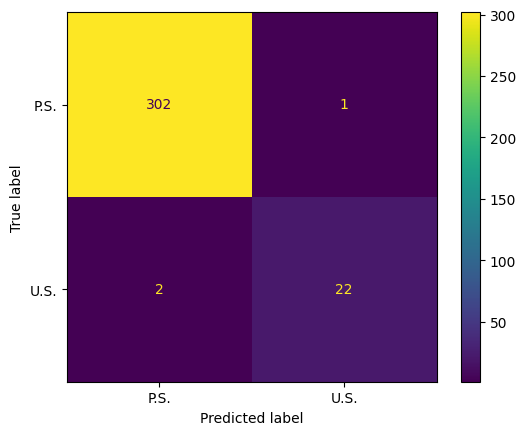

Correctly Classified: 324
Incorrectly Classified: 3


<Figure size 640x480 with 0 Axes>

In [8]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['P.S.', 'U.S.'])
disp.plot()
plt.show()
disp.plot().figure_.savefig('LOG_CM.png')
correct = cm[0][0] + cm[1][1]
incorrect = cm[0][1] + cm [1][0]
print('Correctly Classified:', correct)
print('Incorrectly Classified:', incorrect)

In [9]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       303
           1       0.96      0.92      0.94        24

    accuracy                           0.99       327
   macro avg       0.97      0.96      0.97       327
weighted avg       0.99      0.99      0.99       327



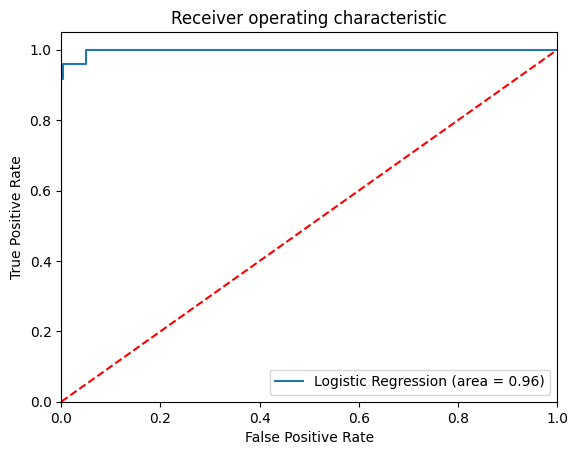

In [10]:
# ROC Curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()